-------------------------------------------------------------------------------------------------------------------------------

## Mobile Phone Analysis

Flipkart is a famous Indian E-Commerce website, that offers a wide range of products right from clothing to electronics to edibles to home appliances and whatnot. In this notebook, we closely analyze and visualize the details of a specific product sold on Flipkart. A cell phone is also known as a mobile phone or simply a phone has become a necessity than just a luxury. In this era, each and everyone has their mobile phones. Do we sometimes wonder which phone is the best for me? Many of us generally know what we want, so why not help those who don't? To answer the former question we create 2 data models which will be as follows<br><br>
<u>Model 1:</u><br>
A basic model that predicts the Sales Price of each phone.<br><br>
<u>Model 2:</u><br>
To answer the above question we will introduce an additional attribute that would denote which phone would be the best fit for an appropriate group and later build a predictive model as well.<br>

For this we will observe the following three conditions:<br>
<li>A customer with necessities won't buy a high-priced phone
<li>Young customers will prefer a higher memory phone.
<li>Customer with high ended needs would need a faster phone with good memory<br>

The data used in this notebook has been extracted from the Flipkart website by Web Scraping. The following is a GitHub link that will redirect you to the simple web scraping code.<br>
<a href="https://github.com/ginelledsouza/Web-Scraping">Web Scraping</a>

-------------------------------------------------------------------------------------------------------------------------------

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("MobilePhones.csv")

In [3]:
len(df)

120

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
MobileName    120 non-null object
RAM_GB        120 non-null int64
ROM_GB        120 non-null int64
Ratings       120 non-null int64
Reviews       120 non-null int64
Stars         120 non-null float64
ListPrice     120 non-null int64
SalesPrice    120 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 7.6+ KB


In [5]:
df.describe()

,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,4.358333,65.233333,57315.425000,4767.250000,4.260000,16277.375000,14686.791667
std,4.129817,33.777506,136188.054112,10853.881055,0.461528,11525.593599,10591.813483
min,0.000000,4.000000,53.000000,3.000000,2.800000,609.000000,609.000000
25%,3.000000,32.000000,5365.000000,394.000000,4.300000,9990.000000,8302.250000
50%,4.000000,64.000000,15700.500000,1232.000000,4.400000,12994.500000,10999.000000
75%,4.500000,64.000000,42288.500000,3002.000000,4.500000,18990.000000,16999.000000
max,32.000000,128.000000,805006.000000,66292.000000,4.600000,57800.000000,52999.000000


-------------------------------------------------------------------------------------------------------------------------------

## Data Manipulation

In [6]:
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice
0,"Redmi 8 (Onyx Black, 64 GB)",4,64,674638,50064,4.4,10999,9999
1,"Realme 5i (Forest Green, 64 GB)",4,64,243106,16497,4.5,10999,10999
2,"Realme 5i (Aqua Blue, 64 GB)",4,64,243106,16497,4.5,10999,10999
3,"Redmi 8 (Sapphire Blue, 64 GB)",4,32,674638,50064,4.4,10999,9999
4,"POCO X2 (Matrix Purple, 128 GB)",6,64,133486,14732,4.5,19999,18499


In [7]:
df['MobileName'][0].split("(")[1].split(",")

['Onyx Black', ' 64 GB)']

In [8]:
df['Color'] = df['MobileName'].apply(lambda x : x.split(",")[0].split("(")[1] 
                                        if len(x.split(",")[0].split("(")) > 1 else 'No Color')

df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color
0,"Redmi 8 (Onyx Black, 64 GB)",4,64,674638,50064,4.4,10999,9999,Onyx Black
1,"Realme 5i (Forest Green, 64 GB)",4,64,243106,16497,4.5,10999,10999,Forest Green
2,"Realme 5i (Aqua Blue, 64 GB)",4,64,243106,16497,4.5,10999,10999,Aqua Blue
3,"Redmi 8 (Sapphire Blue, 64 GB)",4,32,674638,50064,4.4,10999,9999,Sapphire Blue
4,"POCO X2 (Matrix Purple, 128 GB)",6,64,133486,14732,4.5,19999,18499,Matrix Purple


In [9]:
df['Brand'] = df['MobileName'].apply(lambda x : x.split()[0])
df['Brand'] = df['Brand'].apply(lambda x : 'I Kall' if x == 'I' else x)
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand
0,"Redmi 8 (Onyx Black, 64 GB)",4,64,674638,50064,4.4,10999,9999,Onyx Black,Redmi
1,"Realme 5i (Forest Green, 64 GB)",4,64,243106,16497,4.5,10999,10999,Forest Green,Realme
2,"Realme 5i (Aqua Blue, 64 GB)",4,64,243106,16497,4.5,10999,10999,Aqua Blue,Realme
3,"Redmi 8 (Sapphire Blue, 64 GB)",4,32,674638,50064,4.4,10999,9999,Sapphire Blue,Redmi
4,"POCO X2 (Matrix Purple, 128 GB)",6,64,133486,14732,4.5,19999,18499,Matrix Purple,POCO


In [10]:
df['MobileName'] = df['MobileName'].apply(lambda x : x.split("(")[0])
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand
0,Redmi 8,4,64,674638,50064,4.4,10999,9999,Onyx Black,Redmi
1,Realme 5i,4,64,243106,16497,4.5,10999,10999,Forest Green,Realme
2,Realme 5i,4,64,243106,16497,4.5,10999,10999,Aqua Blue,Realme
3,Redmi 8,4,32,674638,50064,4.4,10999,9999,Sapphire Blue,Redmi
4,POCO X2,6,64,133486,14732,4.5,19999,18499,Matrix Purple,POCO


In [11]:
df['Discount'] = df['ListPrice'] - df['SalesPrice']
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand,Discount
0,Redmi 8,4,64,674638,50064,4.4,10999,9999,Onyx Black,Redmi,1000
1,Realme 5i,4,64,243106,16497,4.5,10999,10999,Forest Green,Realme,0
2,Realme 5i,4,64,243106,16497,4.5,10999,10999,Aqua Blue,Realme,0
3,Redmi 8,4,32,674638,50064,4.4,10999,9999,Sapphire Blue,Redmi,1000
4,POCO X2,6,64,133486,14732,4.5,19999,18499,Matrix Purple,POCO,1500


-------------------------------------------------------------------------------------------------------------------------------

## Data Visualization

Realme      33
Vivo        16
OPPO        16
I Kall      13
Apple       11
Redmi       10
Infinix      8
POCO         5
Motorola     3
Tecno        3
Lava         1
Nokia        1
Name: Brand, dtype: int64


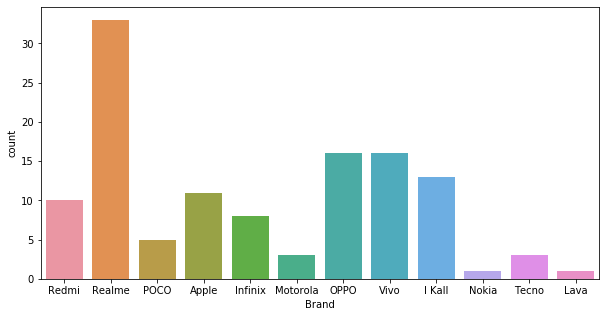

In [12]:
print(df['Brand'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot('Brand', data=df)

There are many products available that are manufactured by "RealMe". Let us now view how many distinct products are manufactured and sold by each of these brands.

Realme 6                   7
Apple iPhone XR            6
Realme C2                  6
Realme 6 Pro               6
POCO X2                    5
Redmi Note 8 Pro           4
Realme Narzo 10A           4
OPPO A5s                   4
OPPO A12                   4
Apple iPhone SE            4
OPPO A9 2020               4
Redmi 8A Dual              4
Vivo Z1x                   3
I Kall K6                  3
Infinix S5 Pro             3
I Kall K220                3
Motorola G8 Power Lite     3
Infinix Smart 4 Plus       3
Realme Narzo 10            3
I Kall K1000               3
Name: MobileName, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

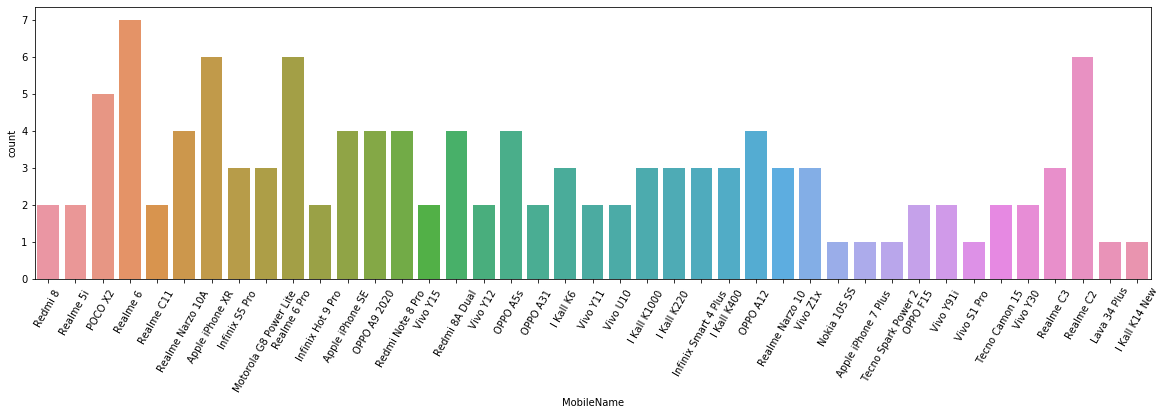

In [13]:
print(df['MobileName'].value_counts()[:20])

plt.figure(figsize=(20,5))
sns.countplot('MobileName', data=df)
plt.xticks(rotation=60)

We observe that "Realme" is the only brand that does not manufacture only have a single model, but have a variety of models available - "Realme 5i, Realme 6, Realme C11, Realme Narzo 10A, Realme 6 Pro and many". Whereas other products have only variations within their model.
The "Realme Narzo 10A" mobile phones available for sale have the most variation within the model.

4.4    40
4.5    28
4.3    19
4.6    12
4.2     7
2.8     3
3.1     3
2.9     3
3.0     3
4.1     1
3.4     1
Name: Stars, dtype: int64


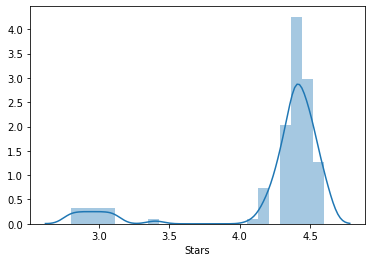

In [14]:
print(df['Stars'].value_counts())

sns.distplot(df['Stars'])

The stars given to the product lie between 3.0 to 4.6.

In [15]:
print("Phones with lowest stars")
print("\n".join(df[df['Stars']==3.0]['MobileName'].unique()))

print("\nPhones with highest stars")
print("\n".join(df[df['Stars']==4.6]['MobileName'].unique()))

Phones with lowest stars
I Kall K6 

Phones with highest stars
Realme C11 
Realme Narzo 10A 
Apple iPhone XR 


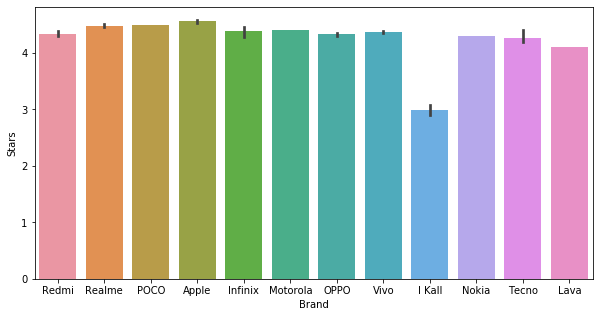

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(df['Brand'],df['Stars'],data=df)

Apart from "I Kall" the stars given to all other brands are better. Probably the reason being that the company may not be known by many customers. Thus does not satisfy the consumer mentality of fimilarity.  

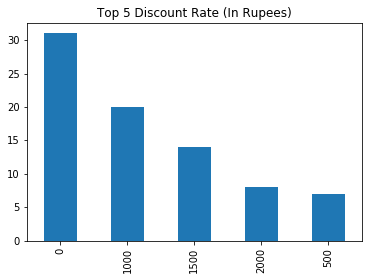

In [17]:
discount = df['Discount'].value_counts()[:5]
discount.plot(kind='bar',title='Top 5 Discount Rate (In Rupees)')

Some products do not offer any discount. But, among those that offer 1000₹ is the most offered discount.

In [18]:
print("*** RAM *** ")
print(df['RAM_GB'].value_counts())
print("\n*** ROM *** ")
print(df['ROM_GB'].value_counts())

*** RAM *** 
4     46
3     21
6     18
2     12
0     11
8     10
32     2
Name: RAM_GB, dtype: int64

*** ROM *** 
64     62
32     30
128    22
16      5
4       1
Name: ROM_GB, dtype: int64


There are 3 inconsistencies in the values of the RAM and ROM. Thus we drop these 3 rows.  

In [19]:
print(df[df['RAM_GB'] == 32].index)
print(df[df['ROM_GB'] == 4].index)

Int64Index([115, 118], dtype='int64')
Int64Index([80], dtype='int64')


In [20]:
df.drop([115,118,80], inplace=True,axis=0)

*** RAM *** 
4    45
3    21
6    18
2    12
0    11
8    10
Name: RAM_GB, dtype: int64

*** ROM *** 
64     61
32     29
128    22
16      5
Name: ROM_GB, dtype: int64


Text(0.5, 0, 'GB')

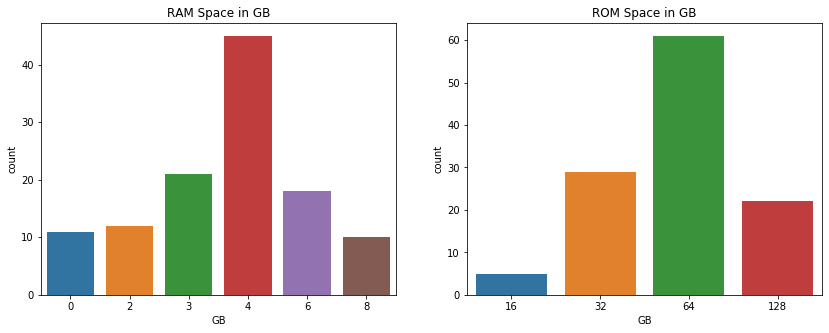

In [21]:
print("*** RAM *** ")
print(df['RAM_GB'].value_counts())
print("\n*** ROM *** ")
print(df['ROM_GB'].value_counts())

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title("RAM Space in GB")
sns.countplot('RAM_GB', data=df)
plt.xlabel("GB")

plt.subplot(1,2,2)
plt.title("ROM Space in GB")
sns.countplot('ROM_GB', data=df)
plt.xlabel("GB")

The maximum amount of RAM and ROM are 8GB and 128GB respectively. There are many Mobile Phones with a 4GB RAM and 64GB ROM.

Blue                14
Black                7
Lightning Orange     4
Comet White          4
Red                  4
Sea Blue             3
White                3
Aqua Blue            3
Comet Blue           3
Atlantis Blue        3
Name: Color, dtype: int64


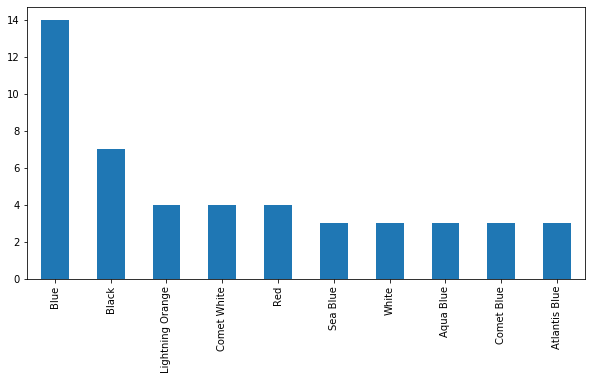

In [22]:
print(df['Color'].value_counts()[:10])

popcol = df['Color'].value_counts()[:10]

plt.figure(figsize=(10,5))
popcol.plot(kind='bar')

Blue and White-colored phones are largely available.

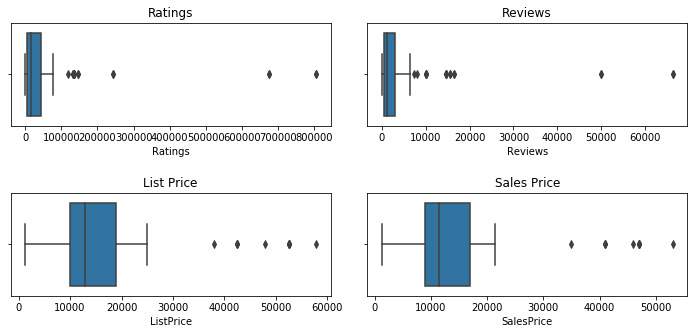

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title("Ratings")
sns.boxplot('Ratings', data=df)

plt.subplot(2,2,2)
plt.title("Reviews")
sns.boxplot('Reviews', data=df)

plt.subplot(2,2,3)
plt.title("List Price")
sns.boxplot('ListPrice', data=df)

plt.subplot(2,2,4)
plt.title("Sales Price")
sns.boxplot('SalesPrice', data=df)

plt.tight_layout(pad=2.0)

We notice each of these attributes has an outlier which could probably be one product itself that causes to be as an outlier for all the other attributes. We will need to handle this as outliers would lead to building a wrong predictive model. We will first deal with the outliers with the help of the Reviews attribute.

In [24]:
df = df[df['Reviews'] < 5500]
df = df[df['Ratings'] < 60000]

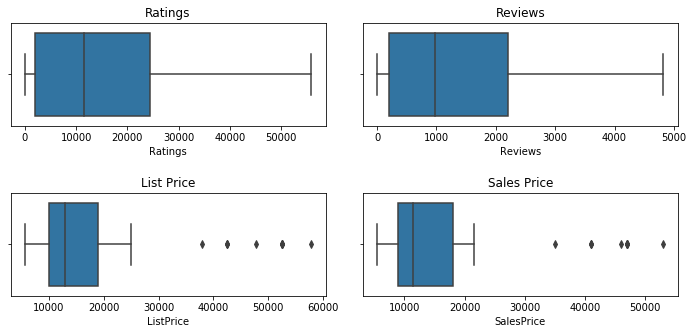

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title("Ratings")
sns.boxplot('Ratings', data=df)

plt.subplot(2,2,2)
plt.title("Reviews")
sns.boxplot('Reviews', data=df)

plt.subplot(2,2,3)
plt.title("List Price")
sns.boxplot('ListPrice', data=df)

plt.subplot(2,2,4)
plt.title("Sales Price")
sns.boxplot('SalesPrice', data=df)

plt.tight_layout(pad=2.0)

So, we can see that our assumption that the outlier may belong to a single product was wrong thus we need to handle this additional outlier before we build our predictive model.

In [26]:
df = df[df['ListPrice'] < 30000]

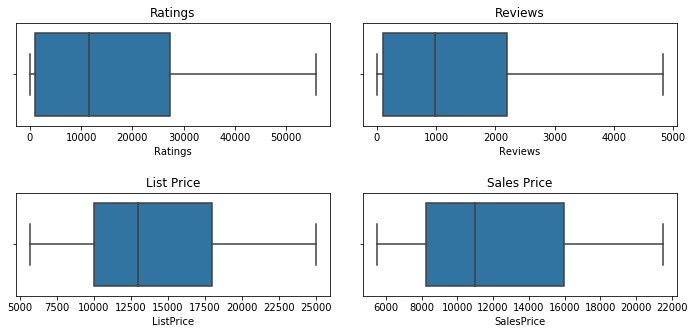

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title("Ratings")
sns.boxplot('Ratings', data=df)

plt.subplot(2,2,2)
plt.title("Reviews")
sns.boxplot('Reviews', data=df)

plt.subplot(2,2,3)
plt.title("List Price")
sns.boxplot('ListPrice', data=df)

plt.subplot(2,2,4)
plt.title("Sales Price")
sns.boxplot('SalesPrice', data=df)

plt.tight_layout(pad=2.0)

Finally, the two outliers are handled and we can proceed with other analyses. Let us now see some relationships between various attributes.

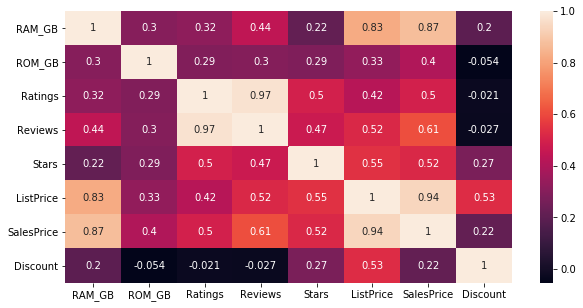

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

We observe that there is a high positive correlation between the size of the RAM and the List and Sales Price. There is also a positive correlation between Ratings and Review and List and Sales Price. Also, the attribute Discount has a negative correlation with the attributes of ROM_GB, Ratings, and Reviews. We will now analyze positively and negatively related attributes. 

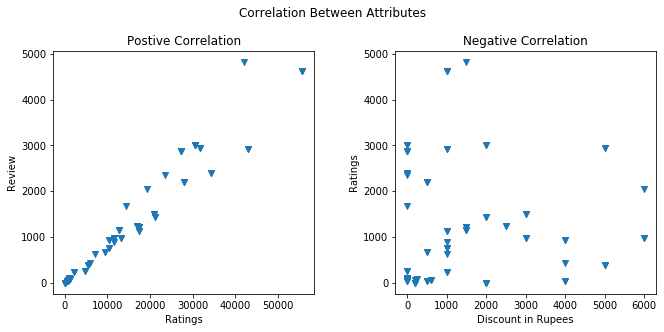

In [29]:
plt.figure(figsize=(10,5))

plt.suptitle("Correlation Between Attributes")

plt.subplot(1,2,1)
plt.title("Postive Correlation")
plt.scatter(df['Ratings'],df['Reviews'], marker='v')
plt.xlabel("Ratings")
plt.ylabel("Review")

plt.subplot(1,2,2)
plt.title("Negative Correlation")
plt.scatter(df['Discount'],df['Reviews'], marker='v')
plt.xlabel("Discount in Rupees")
plt.ylabel("Ratings")

plt.tight_layout(pad=3.5)

We observe a strong positive correlation between Ratings and Reviews which means with every increase in the number of ratings there will be an equivalent increase in the number of reviews. Whereas in the negative correlation we spot a slightly negative relation, that means for some products that have lesser discounts receive fewer numbers or ratings and reviews.

In [30]:
table = pd.pivot_table(df, index='Brand', values=['SalesPrice','Discount','Ratings'])
table

,Discount,Ratings,SalesPrice
Brand,,,
I Kall,200.000000,506.250000,6799.000000
Infinix,1937.500000,9066.375000,9936.500000
Motorola,500.000000,27992.000000,9499.000000
OPPO,3312.500000,10612.625000,12990.000000
POCO,1500.000000,42062.000000,21499.000000
Realme,647.058824,26625.764706,14704.882353
Redmi,557.375000,22377.750000,13013.125000
Tecno,1000.000000,2219.000000,11499.000000
Vivo,2214.285714,15798.214286,12490.000000


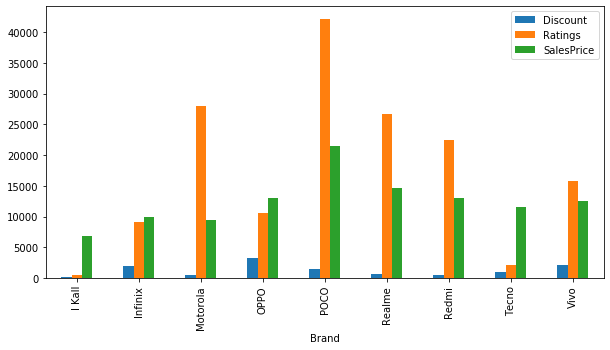

In [31]:
table.plot(kind='bar',figsize=(10,5))

I Kall offers a very less discount whereas OPPO has the highest. As far as the Ratings are concerned we observe that POCO has received a far better number of ratings as compared to the rest of the brands. Also, its Sales Price is much more than the rest.

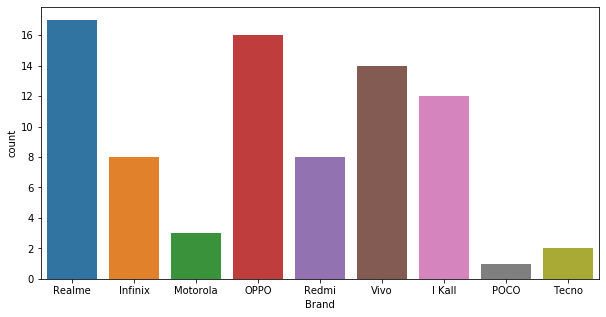

In [32]:
plt.figure(figsize=(10,5))
sns.countplot('Brand', data=df)

Clubbing the above two graphs we can get a lot of insights. Although Realme has a variety of products their ratings are far less than POCO's even though POCO offers a limited number of models. It seems like a variation of models does no good to OPPO as well.

-------------------------------------------------------------------------------------------------------------------------------

## Summary of Analysis

<li>Several cell phones manufactured by Realme are available. These phones not only provide a variety of models but also has many variations concerning the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;color of the models.</li>
<li>The rating of Model "I Kall K6" is very low, whereas the ratings of model "Realme C11, Apple iPhone XR, and Realme Narzo 10A" are high. This indicates &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;that these two models are very popular among people and satisfy customers' needs.</li>
<li>While analysis we realized there were some data inconsistencies in the value of RAM and ROM, since the number of inconsistent values is very small we &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;choose to drop them by their row index.</li>
<li>Several phones are having basic configurations that consist of a 4GB RAM and 64GB ROM where the ROM is nothing but the external storage capacity of &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a phone.</li>
<li>We observe that there are many variations on the colors Blue and White, probably these colors are well demanded by the customers.</li>
<li>We came across several outliers in the attributes Ratings, Reviews, and List Price. We eliminated them by imposing conditions on the data frame.</li>
<li>Several positive and negative relationship was found between many attributes.</li>
<li>Lastly, we notice that despite the number of available POCO phones are less this product receives a good amount of ratings for their phone and they offer a &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;moderate amount of discount. On the other hand, OPPO and Realme having a variation of its models fail to receive equivalent ratings.</li> 

 

-------------------------------------------------------------------------------------------------------------------------------

## Feature Engineering

In [33]:
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand,Discount
6,Realme 6,6,64,30619,3002,4.4,17999,15999,Comet Blue,Realme,2000
8,Realme C11,2,128,17476,1209,4.6,8999,7499,Rich Green,Realme,1500
9,Realme C11,2,32,17476,1209,4.6,8999,7499,Rich Grey,Realme,1500
10,Realme Narzo 10A,3,32,42968,2926,4.6,9999,8999,So White,Realme,1000
11,Realme Narzo 10A,4,64,17313,1129,4.6,10999,9999,So Blue,Realme,1000


In [34]:
df.Brand.value_counts().index

Index(['Realme', 'OPPO', 'Vivo', 'I Kall', 'Infinix', 'Redmi', 'Motorola',
       'Tecno', 'POCO'],
      dtype='object')

In [35]:
df['Brand'] = df['Brand'].map({'Realme':0,'Vivo':1,'OPPO':2,'I Kall':3,'Redmi':4,
                               'Infinix':5,'POCO':7,'Motorola':8,'Tecno':9})   
df.head(10)

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand,Discount
6,Realme 6,6,64,30619,3002,4.4,17999,15999,Comet Blue,0,2000
8,Realme C11,2,128,17476,1209,4.6,8999,7499,Rich Green,0,1500
9,Realme C11,2,32,17476,1209,4.6,8999,7499,Rich Grey,0,1500
10,Realme Narzo 10A,3,32,42968,2926,4.6,9999,8999,So White,0,1000
11,Realme Narzo 10A,4,64,17313,1129,4.6,10999,9999,So Blue,0,1000
12,Realme Narzo 10A,4,32,17313,1129,4.6,10999,9999,So White,0,1000
13,Realme Narzo 10A,3,64,42968,2926,4.6,9999,8999,So Blue,0,1000
15,Realme 6,6,64,30619,3002,4.4,17999,15999,Comet White,0,2000
17,Infinix S5 Pro,4,64,12764,1149,4.5,12999,11499,Violet,5,1500
18,Motorola G8 Power Lite,4,64,27992,2199,4.4,9999,9499,Royal Blue,8,500


-------------------------------------------------------------------------------------------------------------------------------

## Data Modeling

-------------------------------------------------------------------------------------------------------------------------------

## <li> Model 1

We will first build a model that can predict the Sales Price of each phone.
For the purpose of Data Modeling we need to split our data into training and test set. Once the split is done we can put our data into various models and check each the precision of each model. We select the model with the highest precision score.

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
dfnumberic = df.select_dtypes(include=[np.number])
dfnumberic.head()

,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Brand,Discount
6,6,64,30619,3002,4.4,17999,15999,0,2000
8,2,128,17476,1209,4.6,8999,7499,0,1500
9,2,32,17476,1209,4.6,8999,7499,0,1500
10,3,32,42968,2926,4.6,9999,8999,0,1000
11,4,64,17313,1129,4.6,10999,9999,0,1000


In [38]:
print("Shape of the numberic data frame")
print(dfnumberic.shape)

Shape of the numberic data frame
(81, 9)


In [39]:
X = dfnumberic.drop('SalesPrice',axis=1)
y = dfnumberic['SalesPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 1. Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predictionslrm = lrm.predict(X_test)

In [43]:
scorelrm = round((lrm.score(X_test, y_test)*100),2)
print ("Model Score:",scorelrm,"%")

Model Score: 100.0 %


## 2. Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

In [45]:
rrm = Ridge(alpha=100)
rrm.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
predictionrrm = rrm.predict(X_test)

In [47]:
scorerrm = round((rrm.score(X_test, y_test)*100),2)
print ("Model Score:",scorerrm,"%")

Model Score: 100.0 %


In [48]:
data = [['Linear Regression',scorelrm],['Ridge Regression',scorerrm]]
final = pd.DataFrame(data,columns=['Algorithm','Precision'],index=[1,2])
final

,Algorithm,Precision
1,Linear Regression,100.0
2,Ridge Regression,100.0


We see that both our models are able to perfectly predict the price of the phone but in reality, this would not be completely possible. This result of a perfect score is caused because of overfitting, due to the small amount of data.  

------------------------------------------------------------------------------------------------------------------------------

## <li> Model 2

In [49]:
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand,Discount
6,Realme 6,6,64,30619,3002,4.4,17999,15999,Comet Blue,0,2000
8,Realme C11,2,128,17476,1209,4.6,8999,7499,Rich Green,0,1500
9,Realme C11,2,32,17476,1209,4.6,8999,7499,Rich Grey,0,1500
10,Realme Narzo 10A,3,32,42968,2926,4.6,9999,8999,So White,0,1000
11,Realme Narzo 10A,4,64,17313,1129,4.6,10999,9999,So Blue,0,1000


We now create an attribute that suggests which phone is suitable for what kind of a person. For this, we will use only 3 attributes from the data frame (df) they are RAM_GB, ROM_GB, and SalePrice.

In [50]:
df['UserType'] = 'Teen'
high = df[(df['RAM_GB'] > 4) & (df['ROM_GB'] > 32)].index
low =  df[(df['SalesPrice'] < 12000) & (df['ROM_GB'] < 64)].index

In [51]:
for i in high:
    df['UserType'].loc[i] = 'High'
for i in low:
    if i not in high:
        df['UserType'].loc[i] = 'Low'

C:\Users\Ginelle\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df['UserType'].value_counts()

Teen    43
High    20
Low     18
Name: UserType, dtype: int64

In [53]:
df.head()

,MobileName,RAM_GB,ROM_GB,Ratings,Reviews,Stars,ListPrice,SalesPrice,Color,Brand,Discount,UserType
6,Realme 6,6,64,30619,3002,4.4,17999,15999,Comet Blue,0,2000,High
8,Realme C11,2,128,17476,1209,4.6,8999,7499,Rich Green,0,1500,Teen
9,Realme C11,2,32,17476,1209,4.6,8999,7499,Rich Grey,0,1500,Low
10,Realme Narzo 10A,3,32,42968,2926,4.6,9999,8999,So White,0,1000,Low
11,Realme Narzo 10A,4,64,17313,1129,4.6,10999,9999,So Blue,0,1000,Teen


In [54]:
df['UserType'] = df['UserType'].map({'High':0,'Teen':1,'Low':2})

In [55]:
dfnumberic = df.select_dtypes(include=[np.number]).drop('ListPrice', axis=1)
dfnumberic.head()

,RAM_GB,ROM_GB,Ratings,Reviews,Stars,SalesPrice,Brand,Discount,UserType
6,6,64,30619,3002,4.4,15999,0,2000,0
8,2,128,17476,1209,4.6,7499,0,1500,1
9,2,32,17476,1209,4.6,7499,0,1500,2
10,3,32,42968,2926,4.6,8999,0,1000,2
11,4,64,17313,1129,4.6,9999,0,1000,1


In [56]:
dfnumberic[['Ratings','Reviews','Stars','SalesPrice','Discount']].describe()

,Ratings,Reviews,Stars,SalesPrice,Discount
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,15206.407407,1292.790123,4.174074,11985.950617,1510.604938
std,14608.616686,1291.768330,0.525066,4290.914617,1711.067179
min,53.000000,3.000000,2.800000,5499.000000,0.000000
25%,974.000000,111.000000,4.300000,8249.000000,0.000000
50%,11571.000000,977.000000,4.400000,10990.000000,1000.000000
75%,27363.000000,2199.000000,4.400000,15990.000000,2000.000000
max,55815.000000,4824.000000,4.600000,21499.000000,6000.000000


In [57]:
def ratings(num):
    if num < 10000:
        return 1
    elif num >= 10000 & num < 20000:
        return 2
    elif num >= 20000 & num < 30000:
        return 3
    elif num >= 30000 & num < 40000:
        return 4
    elif num >= 40000 & num < 50000:
        return 5
    else:
        return 6
    
    
def reviews(num):
    if num < 1000:
        return 1
    elif num >= 1000 & num < 2000:
        return 2
    elif num >= 2000 & num < 3000:
        return 3
    elif num >= 3000 & num < 4000:
        return 4
    else:
        return 5

    

def salesprice(num):
    if num < 5000:
        return 1
    elif num >= 5000 & num < 10000:
        return 2
    elif num >= 10000 & num < 15000:
        return 3
    elif num >= 15000 & num < 20000:
        return 4
    else:
        return 5
    
def stars(num):
    if num < 3.0:
        return 1
    elif num >= 3 and num < 3.5:
        return 2
    elif num >= 3.5 and num < 4.0:
        return 3
    elif num >= 4.0 and num < 4.5:
        return 4
    else:
        return 5


def discount(num):
    if num == 0:
        return 0
    elif num < 1200:
        return 1
    elif num >= 1200 & num < 2400:
        return 2
    elif num >= 2400 & num < 3600:
        return 3
    elif num >= 4800 & num < 6000:
        return 4
    else:
        return 5

In [58]:
dfnumberic['Ratings'] = dfnumberic['Ratings'].apply(ratings)
dfnumberic['Reviews'] = dfnumberic['Reviews'].apply(reviews)
dfnumberic['Stars'] = dfnumberic['Stars'].apply(stars)
dfnumberic['SalesPrice'] = dfnumberic['SalesPrice'].apply(salesprice)
dfnumberic['Discount'] = dfnumberic['Discount'].apply(discount)

In [59]:
dfnumberic.head()

,RAM_GB,ROM_GB,Ratings,Reviews,Stars,SalesPrice,Brand,Discount,UserType
6,6,64,2,2,4,2,0,2,0
8,2,128,2,2,5,2,0,2,1
9,2,32,2,2,5,2,0,2,2
10,3,32,2,2,5,2,0,1,2
11,4,64,2,2,5,2,0,1,1


In [60]:
X = dfnumberic.drop(['UserType'],axis=1)
y = dfnumberic['UserType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 1. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rmodel = RandomForestClassifier(n_estimators=100)
rmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rprediction = rmodel.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,rprediction))

rscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",rscore,"%")

Confusion Matrix
[[ 3  0  0]
 [ 0 13  1]
 [ 0  0  8]]

Model Score: 96.0 %


## 2. K-Nearest Neighbour

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [66]:
kpredictions = kmodel.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,kpredictions))

kscore = round((kmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",kscore,"%")

Confusion Matrix
[[ 3  0  0]
 [ 0 13  1]
 [ 0  0  8]]

Model Score: 96.0 %


## 3.Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
dprediction = dmodel.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,dprediction))

dscore = round((dmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",dscore,"%")

Confusion Matrix
[[ 3  0  0]
 [ 0 13  1]
 [ 0  0  8]]

Model Score: 96.0 %


In [70]:
data = [['Random Forest',rscore],['K-Nearest Neighbour',kscore],['Decision Tree',dscore]]
final = pd.DataFrame(data,columns=['Algorithm','Precision'],index=[1,2,3])
final

,Algorithm,Precision
1,Random Forest,96.0
2,K-Nearest Neighbour,96.0
3,Decision Tree,96.0


------------------------------------------------------------------------------------------------------------------------------